## This notebook is for plotting loss curves from BERT finetune log files

In [20]:
import matplotlib.pyplot as plt
import json

In [2]:
## Using parsing of stdout

# Epochs
epochs     = !cat 2023_05_04_bert_finetune_chemprot.txt | grep Epoch | cut -d' ' -f3

# Losses
train_loss = !cat 2023_05_04_bert_finetune_chemprot.txt | grep "Average training loss" | cut -d':' -f2
valid_loss = !cat 2023_05_04_bert_finetune_chemprot.txt | grep "Validation Loss" | cut -d':' -f2

# Performance metrics
acc        = []

In [24]:
## Using metrics.txt file
metrics_path = "../models/chemprot-oversampled-10/metrics.txt"
with open(metrics_path, "r") as f:
    config = json.loads(f.read())

epochs      = list(range(1, len(config["average training loss"]) + 1))
train_loss  = config["average training loss"]
valid_loss  = config["average validation loss"]
val_acc     = config["average validation accuracy"]

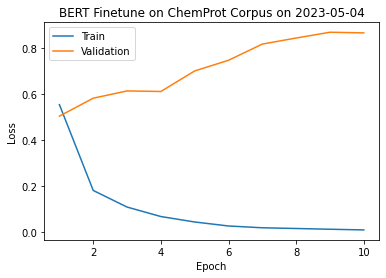

In [26]:
plt.figure()
plt.plot(epochs, train_loss)
plt.plot(epochs, valid_loss)
plt.title("BERT Finetune on ChemProt Corpus on 2023-05-04")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

Text(0, 0.5, 'Accuracy')

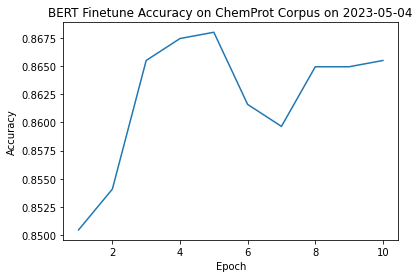

In [27]:
plt.figure()
plt.plot(epochs, val_acc)
plt.title("BERT Finetune Accuracy on ChemProt Corpus on 2023-05-04")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')